1. Загрузите файл HR.csv в pandas dataframe

In [1]:
import pandas as pd

In [3]:
data = pd.read_csv('HR.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


2. Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение).

In [21]:
#расчитаем среднее, среднее отклонение, мин, макс и медиану (50% квантиль)
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [15]:
#моду расчитаем отдельно
data.mode().transpose()[0]

satisfaction_level         0.1
last_evaluation           0.55
number_project               4
average_montly_hours       135
time_spend_company           3
Work_accident                0
left                         0
promotion_last_5years        0
department               sales
salary                     low
Name: 0, dtype: object

3. Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.Определите две самые скоррелированные и две наименее скоррелированные переменные

In [49]:
corr = data.corr()
corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


In [50]:
corr_1 = corr[corr != 1]
corr_2 = corr_1.abs()
corr_2['max'] = corr_2.apply(np.max,axis=1)
corr_2['max']

satisfaction_level       0.388375
last_evaluation          0.349333
number_project           0.417211
average_montly_hours     0.417211
time_spend_company       0.196786
Work_accident            0.154622
left                     0.388375
promotion_last_5years    0.067433
Name: max, dtype: float64

In [24]:
import seaborn as sns

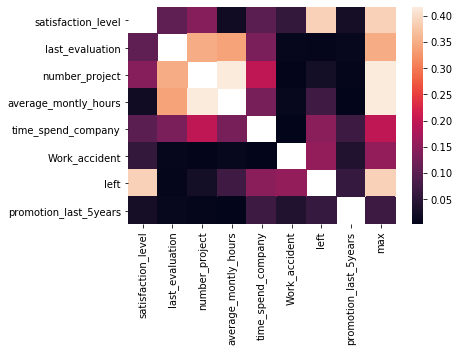

In [52]:
sns.heatmap(corr_2)

И по грфику и по цифрам видно, что две самые скоррелированные переменные это - number_project и average_montly_hours

In [47]:
corr_2['min'] = corr_2.apply(np.min,axis=1)
corr_2['min']

satisfaction_level       0.020048
last_evaluation          0.006567
number_project           0.004741
average_montly_hours     0.003544
time_spend_company       0.002120
Work_accident            0.002120
left                     0.006567
promotion_last_5years    0.003544
Name: min, dtype: float64

Две наименее скоррелированные переменные time_spend_company  и Work_accident  

4. Рассчитайте сколько сотрудников работает в каждом департаменте.

In [71]:
data.reset_index().groupby(['department']).count()['index'].sort_values(ascending=False)

department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: index, dtype: int64

5. Показать распределение сотрудников по зарплатам.

In [83]:
salary_group = data.reset_index().groupby(['salary']).count()['index'].sort_values(ascending=False)
salary_group

salary
low       7316
medium    6446
high      1237
Name: index, dtype: int64

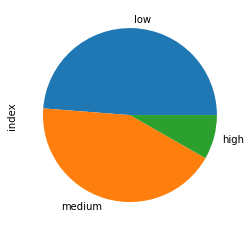

In [76]:
salary_group.plot(kind='pie')

6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [122]:
department_salary = data.pivot_table(index = ['department'], columns = 'salary', values = 'number_project', aggfunc = 'count').sort_values(by = 'low', ascending=False)
department_salary

salary,high,low,medium
department,,,
sales,269,2099,1772
technical,201,1372,1147
support,141,1146,942
IT,83,609,535
product_mng,68,451,383
marketing,80,402,376
RandD,51,364,372
accounting,74,358,335
hr,45,335,359


In [123]:
department_salary['high_share'] = department_salary.eval('high/(high+low+medium)')
department_salary['low_share'] = department_salary.eval('low/(high+low+medium)')
department_salary['medium_share'] = department_salary.eval('medium/(high+low+medium)')

In [124]:
department_salary

salary,high,low,medium,high_share,low_share,medium_share
department,,,,,,
sales,269,2099,1772,0.064976,0.507005,0.428019
technical,201,1372,1147,0.073897,0.504412,0.421691
support,141,1146,942,0.063257,0.514132,0.422611
IT,83,609,535,0.067645,0.496333,0.436023
product_mng,68,451,383,0.075388,0.500000,0.424612
marketing,80,402,376,0.093240,0.468531,0.438228
RandD,51,364,372,0.064803,0.462516,0.472681
accounting,74,358,335,0.096480,0.466754,0.436767
hr,45,335,359,0.060893,0.453315,0.485792


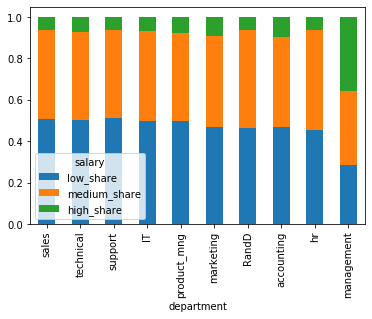

In [125]:
department_salary[['low_share','medium_share','high_share']].plot(kind='bar', stacked=True)

7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [129]:
data.groupby(['salary']).mean()['average_montly_hours']

salary
high      199.867421
low       200.996583
medium    201.338349
Name: average_montly_hours, dtype: float64

Гипотеза неверна - в среднем больше сотрудники с высоким окладом проводят на работе меньше времени(199,9 часов в месяц), чем сотрудники с низким (201 час в месяц)

8. Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):


In [148]:
#Доля сотрудников с повышением за последние 5 лет
promotion_group = data.pivot_table(index = ['promotion_last_5years'], columns = 'left', values = 'number_project', aggfunc = 'count')
promotion_group

left,0,1
promotion_last_5years,,
0,11128,3552
1,300,19


In [151]:
promotion_group.apply(lambda x: x/ x.sum()).iloc[[1], :]

left,0,1
promotion_last_5years,,
1,0.026251,0.005321


In [152]:
#Средняя степень удовлетворенности
data.groupby(['left']).mean()['satisfaction_level']

left
0    0.666810
1    0.440098
Name: satisfaction_level, dtype: float64

In [154]:
#Среднее количество проектов
data.groupby(['left']).mean()['number_project']

left
0    3.786664
1    3.855503
Name: number_project, dtype: float64

9. Разделить данные на тестовую и обучающую выборки.
Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и
salary).
Оценить качество модели на тестовой выборке.

In [165]:
data_LDA = data.drop(columns=['department', 'salary'])

In [166]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data_LDA, test_size=0.2)

In [168]:
y_train, y_test = data_train['left'], data_test['left']
del data_train['left']
del data_test['left']

In [171]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [172]:
lda = LinearDiscriminantAnalysis()

In [173]:
lda.fit(data_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [174]:
from sklearn.metrics import accuracy_score

In [175]:
accuracy_score(y_test, lda.predict(data_test))

0.7573333333333333

Эффективность модели не высокая - 76% предсказаний оказались правильными